# pyecog

### PSD evluation

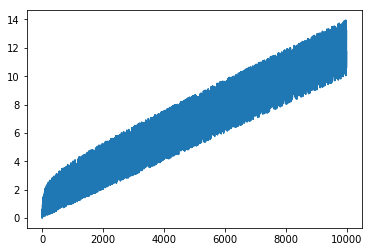

In [61]:
#creation of array 

import numpy as np
import matplotlib.pyplot as plt
n = 100000
flat_data = np.random.rand(n) * np.log10(np.arange(n)+1) + np.arange(n)/1000
plt.close()
plt.figure()
plt.plot(X)
plt.show()

<font color='red'> TODO : scheme of stiched array </font>

In [62]:
fs = 500
chunk_len = 10

In [63]:
# reshape data into arrays, stich together

pad_dp = int((chunk_len / 2) * fs) #depend on epoch size
padded_data = np.pad(flat_data, pad_width=pad_dp, mode='reflect') #add revert semi pad at beginning and end

#divide into n arrays
data_arr = np.reshape(padded_data,newshape=(int(len(padded_data) / fs / chunk_len), int(chunk_len * fs)),
                      order='C')
#for each array, second half equals first half of following array
data_arr_stiched = np.concatenate([data_arr[:-1], data_arr[1:]], axis=1) # arrays, second half equal first half of following array

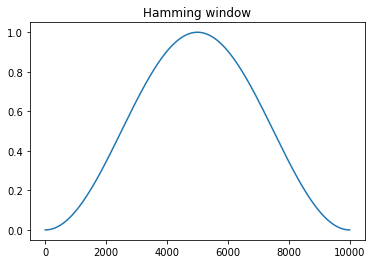

In [64]:
hanning_window = np.hanning(data_arr_stiched.shape[1])
plt.close()
plt.figure()
plt.plot(hanning_window)
plt.title('Hamming window')
plt.show()

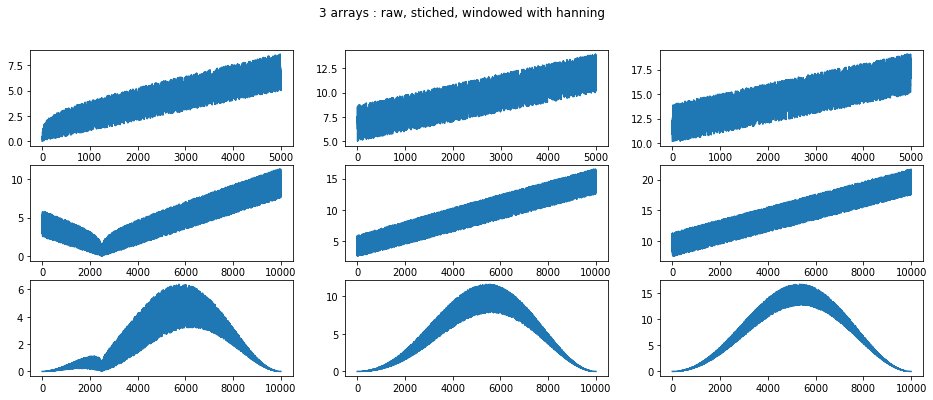

In [77]:
windowed_data = np.multiply(data_arr_stiched, hanning_window)
plt.figure(figsize=(16,6))
for i in np.arange(3):
    plt.subplot(3,3,i +1)
    plt.plot(flat_data[i*5000:(i+1)*5000])
    plt.subplot(3,3,i +4)
    plt.plot(data_arr_stiched[i,:])
    plt.subplot(3,3,i+7)
    plt.plot(windowed_data[i,:])
plt.suptitle('3 arrays : raw, stiched, windowed with hanning')
plt.show()
    

<font color='red'> TODO : windowed data is mainly due to hamming in this case, understand ? 0.325 facto sufficient ? </font>

<font color='red'> rfftfreq Compute the one-dimensional discrete Fourier Transform </font>

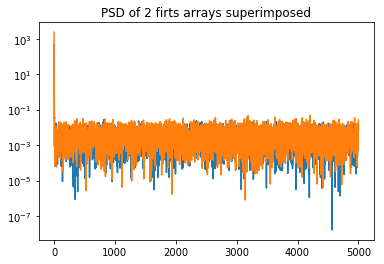

In [78]:
bin_frequencies = np.fft.rfftfreq(int(chunk_len * fs) * 2, 1 / fs)  # *2 as n.points is doubled due to stiching
A = np.abs(np.fft.rfft(windowed_data, axis=1))
psd = 2 * chunk_len * (2 / .375) * (A / (fs * chunk_len * 2)) ** 2  # psd units are "y unit"^2/Hz
plt.figure()
plt.semilogy(psd[0,:])
plt.semilogy(psd[1,:])
plt.title('PSD of 2 firts arrays superimposed')
plt.show()

<font color='red'> Compare with or without hamming, and others ? </font>

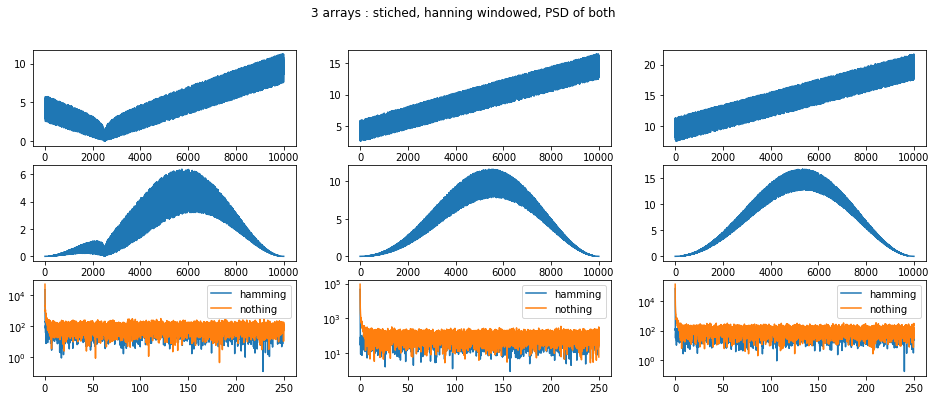

In [79]:
A_noHanning = np.abs(np.fft.rfft(data_arr_stiched, axis=1))
psd_noHanning = 2 * chunk_len * (2) * (A_noHanning / (fs * chunk_len * 2)) ** 2  # psd units are "y unit"^2/Hz

windowed_data = np.multiply(data_arr_stiched, hanning_window)
plt.figure(figsize=(16,6))
for i in np.arange(3):
    plt.subplot(3,3,i +1)
    plt.plot(data_arr_stiched[i,:])
    plt.subplot(3,3,i +4)
    plt.plot(windowed_data[i,:])
    plt.subplot(3,3,i+7)
    plt.semilogy(bin_frequencies, A[i, :], label='hamming')
    plt.semilogy(bin_frequencies, A_noHanning[i,:], label ='nothing')
    plt.legend()
plt.suptitle('3 arrays : stiched, hanning windowed, PSD of both ')
plt.show()

In [ ]:
band = [4,8]
bin_width = np.diff(bin_frequencies[:3])[1]
band_indexes = np.where(np.logical_and(bin_frequencies > lower_freq, bin_frequencies <= upper_freq))[0]
power = np.sum(psd[:, band_indexes], axis=1) * bin_width #One value per epoch, in µV² / Hz

